# Exploratory Data Analysis for Channels as Scalars

Data was taken from:
`/storage/groups/ml01/datasets/raw/20201020_Pelkmans_NascentRNA_hannah.spitzer/` and server `vicb-submit-01`. 

Load libraries and set Directories paths:

In [1]:
import numpy as np
import pandas as pd
# To display all the columns
pd.options.display.max_columns = None
import os
import sys
import matplotlib.pyplot as plt
import json
import seaborn as sns
sns.set_style('darkgrid')

# Set paths
BASE_DIR = os.path.realpath(os.path.join(os.path.abspath(''),'../..'))
if not os.path.exists(BASE_DIR):
    raise Exception('Base path {} does not exist!'.format(BASE_DIR))
else:
    print('BASE_DIR: {}'.format(BASE_DIR))
    
DATA_DIR = '/home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_images_and_masks_no_split'
if not os.path.exists(DATA_DIR):
    raise Exception('Data path {} does not exist!'.format(DATA_DIR))
else:
    print('DATA_DIR: {}'.format(DATA_DIR))
    
# Add BASE_DIR to sys paths (for loading libraries)
sys.path.insert(1, os.path.join(BASE_DIR, 'workspace/libs'))
# Load mpp_data library to convert raw data into images
from pelkmans.mpp_data import MPPData as MPPData

BASE_DIR: /home/hhughes/Documents/Master_Thesis/Project
DATA_DIR: /home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_images_and_masks_no_split


Load pre-processed data

In [2]:
print('Available files in data dir {}:\n{}'.format(DATA_DIR, os.listdir(DATA_DIR)))

# Load files
metadata = pd.read_csv(os.path.join(DATA_DIR, 'metadata.csv'))
channels = pd.read_csv(os.path.join(DATA_DIR, 'channels.csv'))
with open(os.path.join(DATA_DIR, 'params.json')) as params_file:
    param = json.load(params_file)


Available files in data dir /home/hhughes/Documents/Master_Thesis/Project/datasets/184A1_hannah_images_and_masks_no_split:
['metadata_back.csv', 'params.json', 'images', 'channels.csv', 'metadata.csv']


Take a look into the data

In [3]:
metadata

,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
0,369581,plate01,I18,0,0,0,0,9,0,369487,plate01,I18,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,0.797954,0.760859,0.742445,0.634022,0.663027,0.568395,0.730102,0.686346,0.366674,0.575989,0.684307,0.736716,0.732316,0.740041,0.635465,0.678882,0.653309,0.518513,0.664592,0.671655,0.709863,0.704627,0.689181,0.578649,0.640880,0.963868,0.537138,0.541909,0.705251,0.628631,0.742686,0.624242,0.675802,0.691226,0.893528,0.727097,0.778933,0.773748
1,369583,plate01,I18,0,0,0,0,11,0,369489,plate01,I18,0,0,0,0,11,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.723802,0.817599,0.552732,0.545909,0.700967,0.695602,0.729558,0.731996,0.210496,0.457588,0.861228,0.846120,0.567214,0.767485,0.717981,0.654874,0.602190,0.712462,0.664804,0.565396,0.742811,0.644895,0.787064,0.674728,0.644300,0.930544,0.636029,0.651211,0.705137,0.637545,0.862667,0.726507,0.765920,0.681950,0.827772,0.413577,0.617883,0.758037
2,369584,plate01,I18,0,0,0,0,12,0,369490,plate01,I18,0,0,0,0,12,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.840696,0.929793,0.407526,0.486692,0.682011,0.167238,0.440246,0.686533,0.185236,0.378296,0.631725,0.714524,0.305706,0.509345,0.709603,0.537640,0.524173,0.276606,0.669621,0.517582,0.622845,0.632177,0.707219,0.307346,0.463200,0.810092,0.509207,0.573902,0.785905,0.602015,0.843908,0.678252,0.630470,0.658251,0.830965,0.408940,0.674905,0.589623
3,369585,plate01,I18,0,0,0,0,13,0,369491,plate01,I18,0,0,0,0,13,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,CX5461,120.0,0.794479,0.567609,1.046119,0.739995,0.934936,1.018996,0.794462,0.794089,0.178088,0.757432,0.911557,0.777467,0.732617,0.794341,0.449047,0.704155,0.676932,0.505251,0.489204,0.809605,1.337379,0.755681,0.812838,0.839893,0.896986,0.850779,0.849887,0.896995,0.584139,0.764801,0.749374,0.491297,0.856009,0.824890,0.906335,0.571464,0.785784,0.732261
4,369586,plate01,I18,0,0,0,0,14,0,369492,plate01,I18,0,0,0,0,14,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,CX5461,120.0,0.550997,0.608366,0.253561,0.166947,0.445885,0.278494,0.357785,0.432984,0.124483,0.247782,0.028756,0.478999,0.229982,0.437616,0.478644,0.404991,0.382058,0.324963,0.457266,0.362926,0.391432,0.386674,0.504923,0.254977,0.204945,0.621206,0.519153,0.368919,0.519851,0.419770,0.546952,0.507730,0.462206,0.525616,0.836503,0.344327,0.534069,0.564822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11905,196980,plate01,J12,5,3,0,0,16,0,196946,plate01,J12,5,3,0,0,16,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,normal,NaN,0.466116,0.427223,0.524259,0.559983,0.778531,0.549776,0.643514,0.551811,0.193130,0.478116,0.712937,0.743597,0.522384,0.581592,0.384521,0.480271,0.515179,0.437035,0.545412,0.428227,0.565138,0.481548,0.577957,0.520295,0.529232,0.743118,0.569474,0.409859,0.606166,0.481509,0.666436,0.509698,0.621739,0.579675,0.892434,0.762380,0.589774,0.685176
11906,266544,plate01,J12,5,4,0,0,23,0,266495,plate01,J12,5,4,0,0,23,0,0.0,NaN,0.0,NaN,0.0,NaN,S,184A1,

In [5]:
meta_small = metadata[['mapobject_id_cell', 'well_name', 'cell_cycle', 'perturbation', 'duration', '00_EU_avg']].copy()
meta_small

,mapobject_id_cell,well_name,cell_cycle,perturbation,duration,00_EU_avg
0,369487,I18,S,CX5461,120.0,0.727097
1,369489,I18,G1,CX5461,120.0,0.413577
2,369490,I18,G1,CX5461,120.0,0.408940
3,369491,I18,S,CX5461,120.0,0.571464
4,369492,I18,G1,CX5461,120.0,0.344327
...,...,...,...,...,...,...
11905,196946,J12,S,normal,NaN,0.762380
11906,266495,J12,S,normal,NaN,0.796441
11907,266507,J12,S,normal,NaN,0.671556
11908,266512,J12,G1,normal,NaN,0.848631


1.- Primero solo distribucion para ver que factores afectan el transcription rate

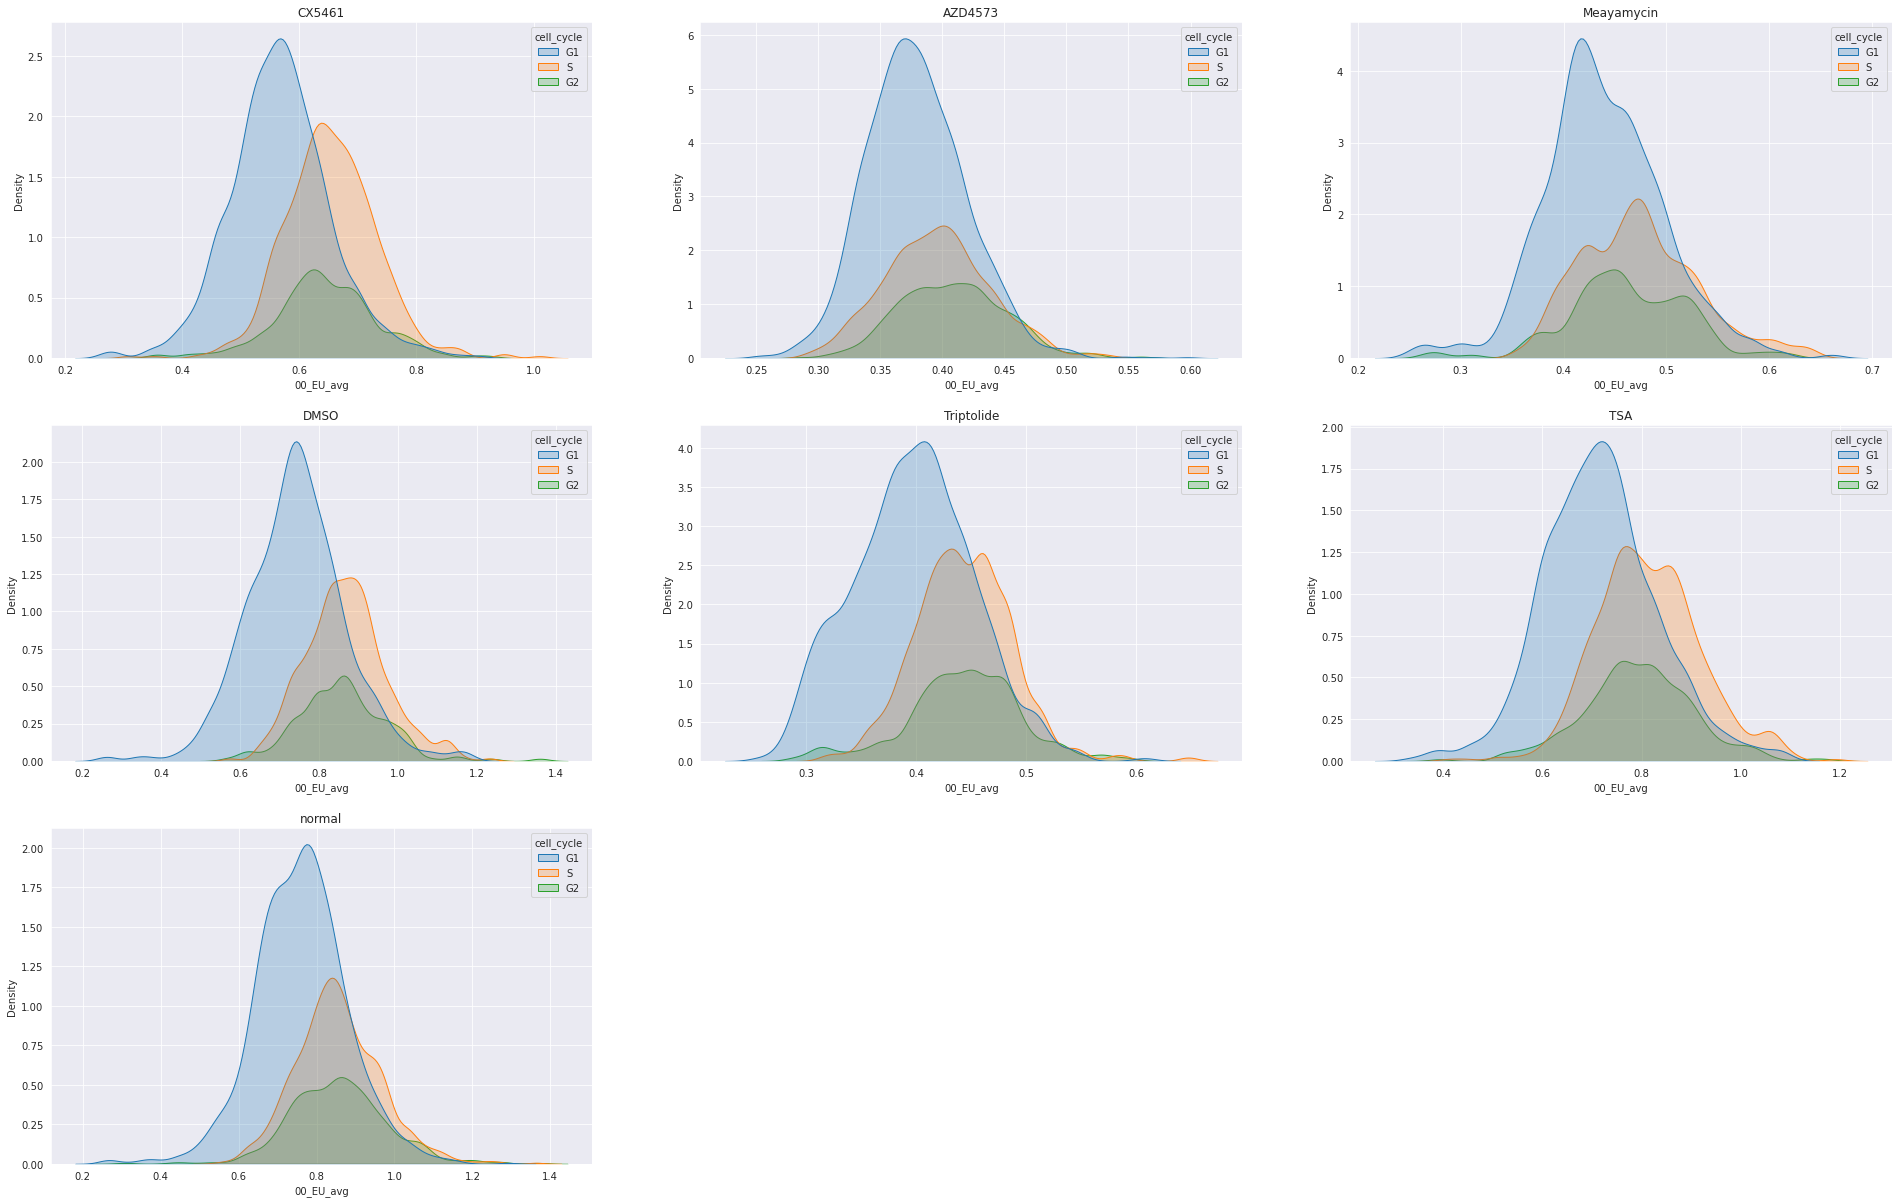

In [6]:
perturbations = meta_small.perturbation.unique()
cell_cycle_order=['G1', 'S', 'G2']

plt.figure(figsize=(3*11,3*7))
for i, per in enumerate(perturbations, 1):
    mask = meta_small.perturbation == per
    
    plt.subplot(3,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='cell_cycle', 
                hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(per)

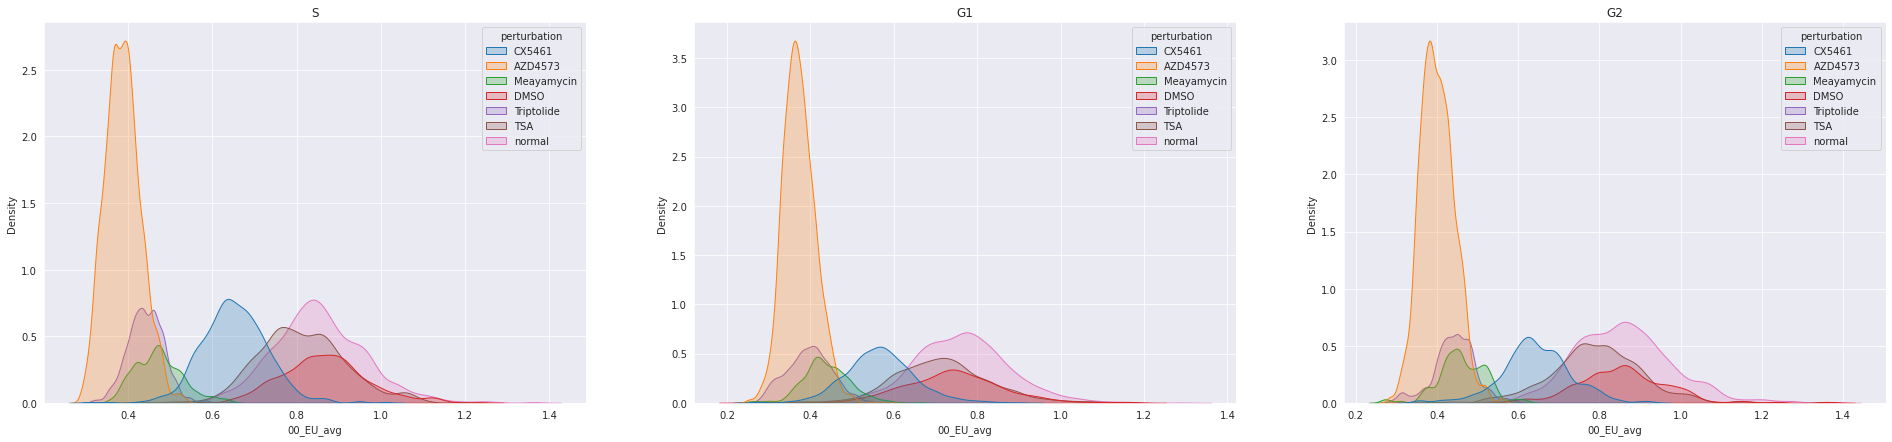

In [47]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='perturbation', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

# 1.- Does Cell Cycle influence the TR?

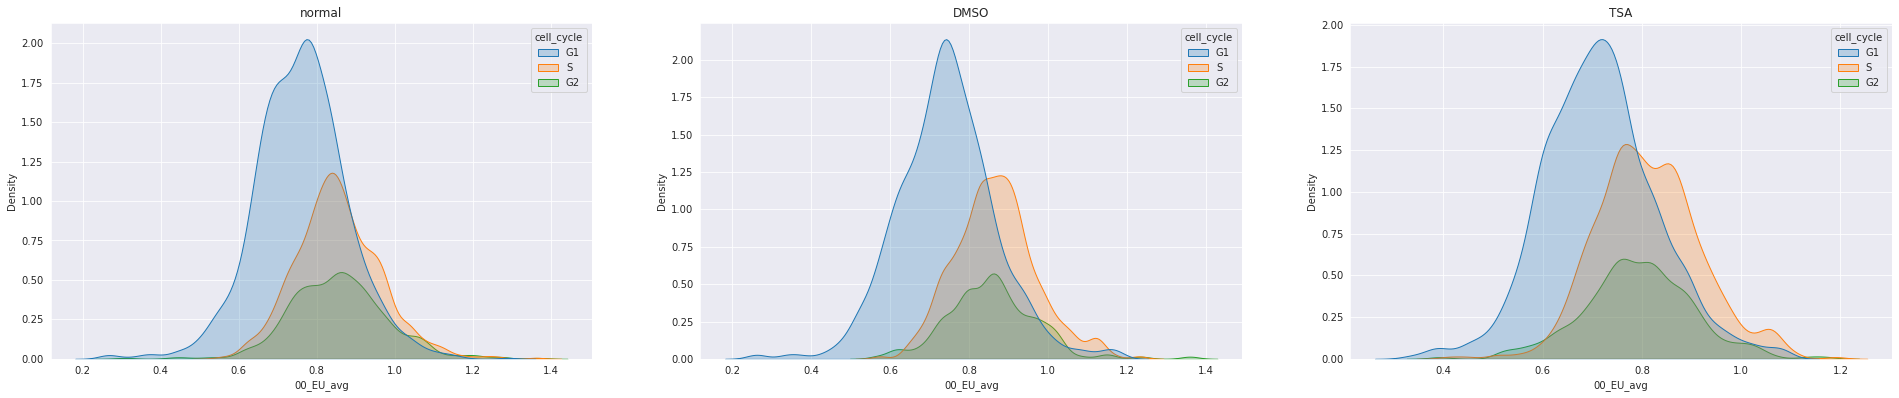

In [55]:
#perturbations = meta_small.perturbation.unique()
perturbations = ['normal', 'DMSO', 'TSA']
cell_cycle_order=['G1', 'S', 'G2']

plt.figure(figsize=(3*11,3*7))
for i, per in enumerate(perturbations, 1):
    mask = meta_small.perturbation == per
    
    plt.subplot(3,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='cell_cycle', 
                hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(per)

## Yes!

# 2.- Has the TR the same distribution under the perturbations DMSO, TSA y Normal?

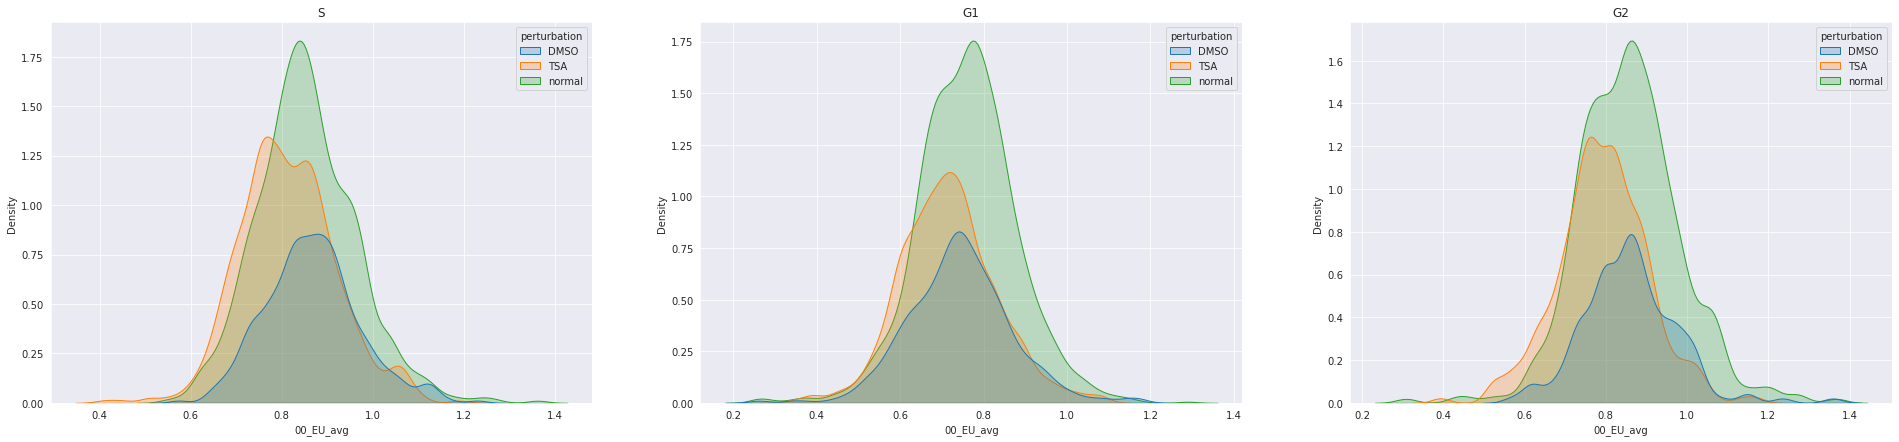

In [54]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'normal') | (meta_small.perturbation == 'DMSO') | (meta_small.perturbation == 'TSA')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='perturbation', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

## Almost, aparentlly the TSA has a lower TR mean.

# 3.- Does the well_name influence the TR distribution?

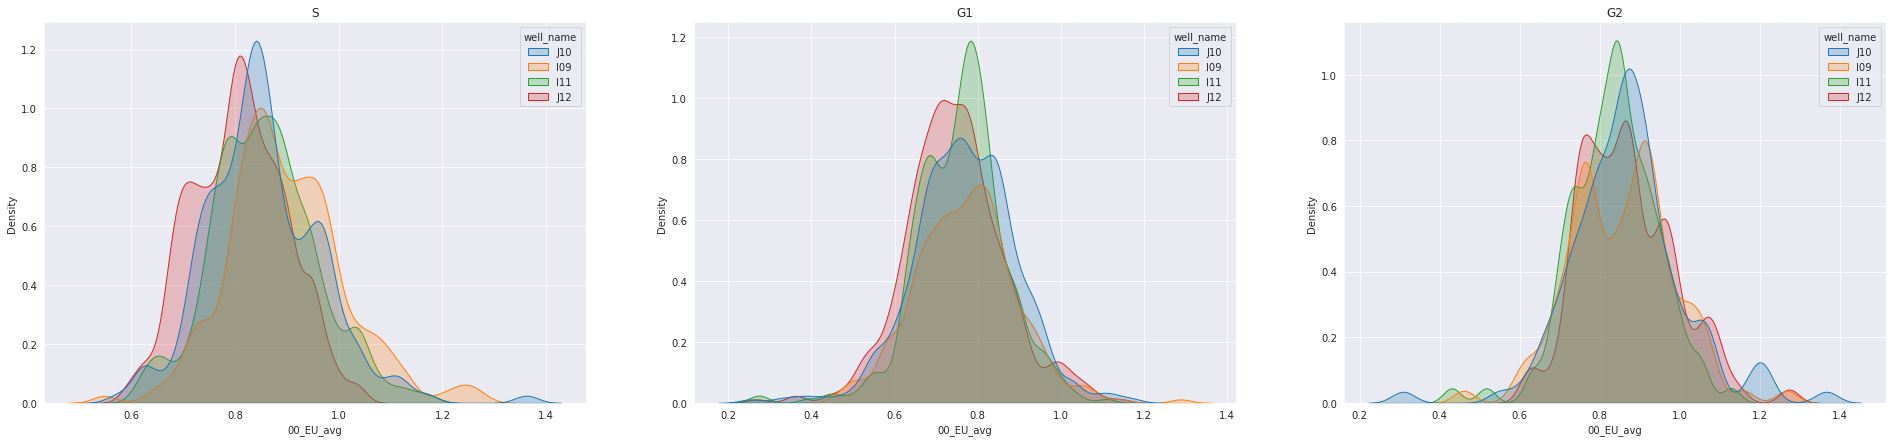

In [62]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'normal')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='well_name', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

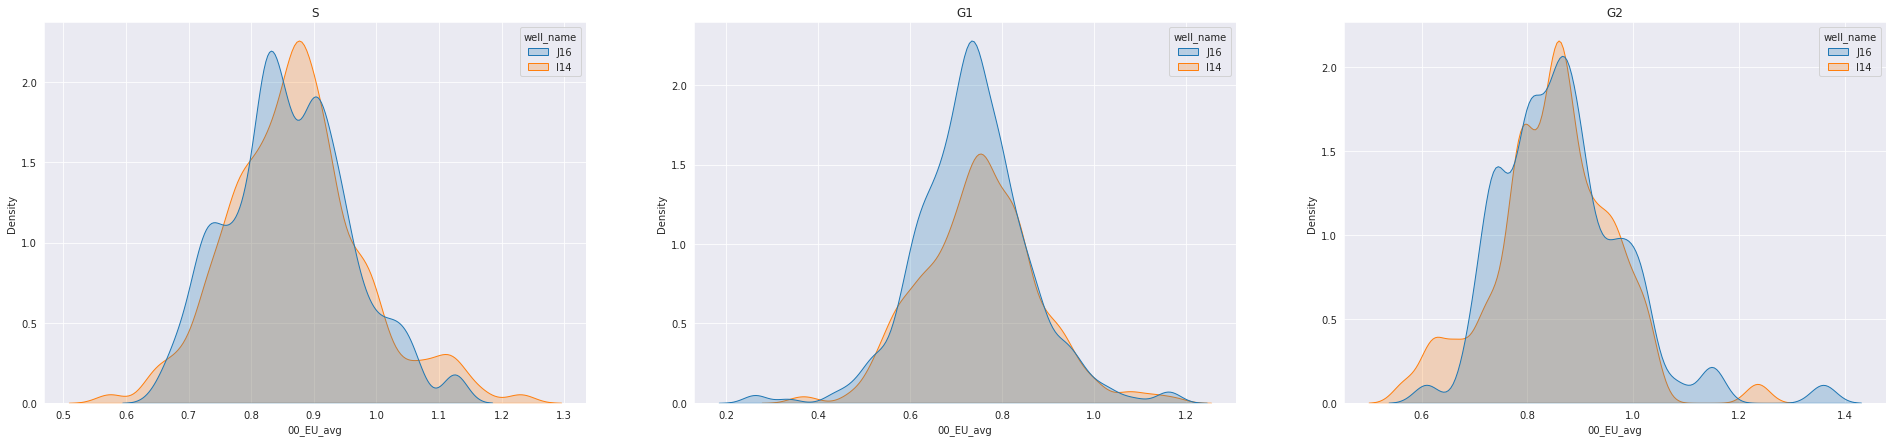

In [63]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'DMSO')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='well_name', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

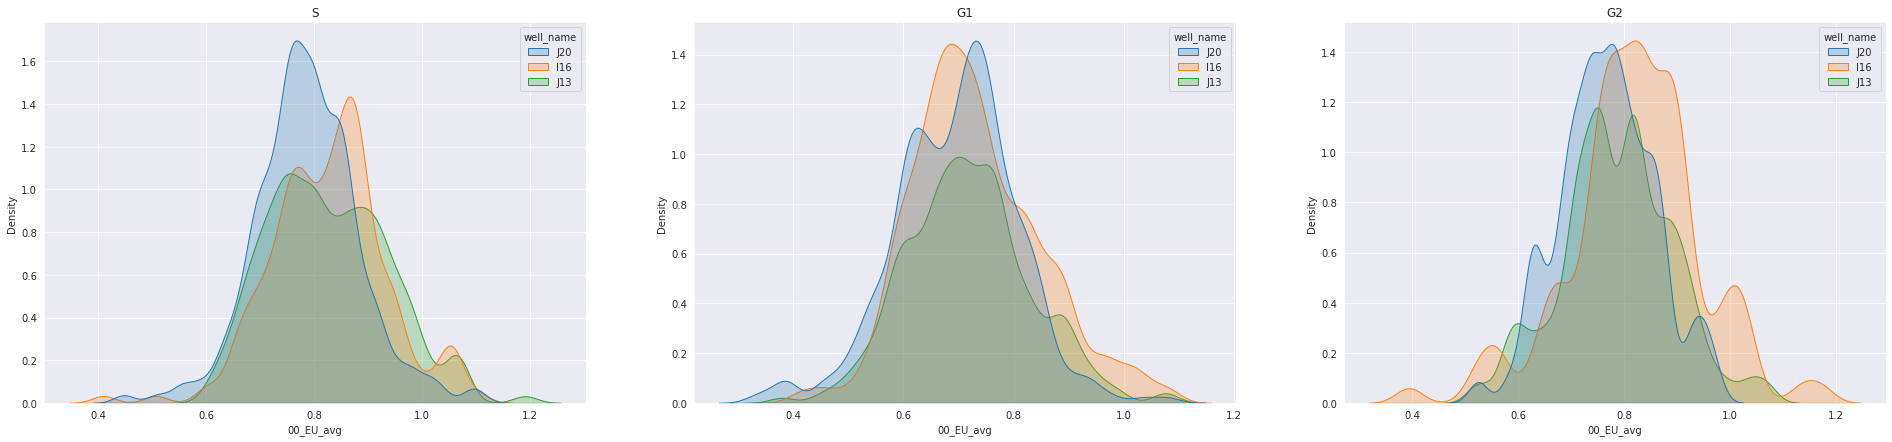

In [64]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'TSA')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='well_name', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

## Aparentlly no (at least for perturbations normal, TSA, DMSO

# Does the duration influence the TR distribution?

In [71]:
mask = meta_small.perturbation == 'normal'
meta_small[mask].duration.unique()

array([nan])

The "duration" is the time in secons that the perturbation was cleaned. Therefore, in "normal" is nan (no cleaning needed)

In [72]:
mask = meta_small.perturbation == 'DMSO'
meta_small[mask].duration.unique()

array([720., 120.])

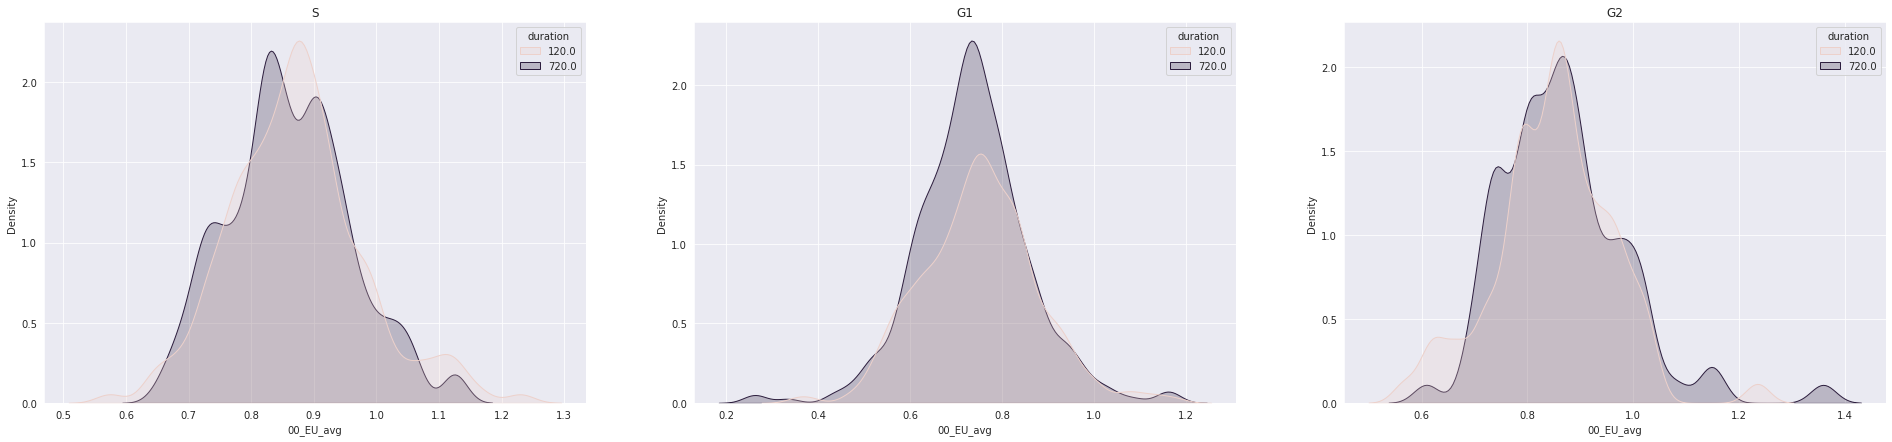

In [66]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'DMSO')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='duration', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

In [73]:
mask = meta_small.perturbation == 'TSA'
meta_small[mask].duration.unique()

array([30.])

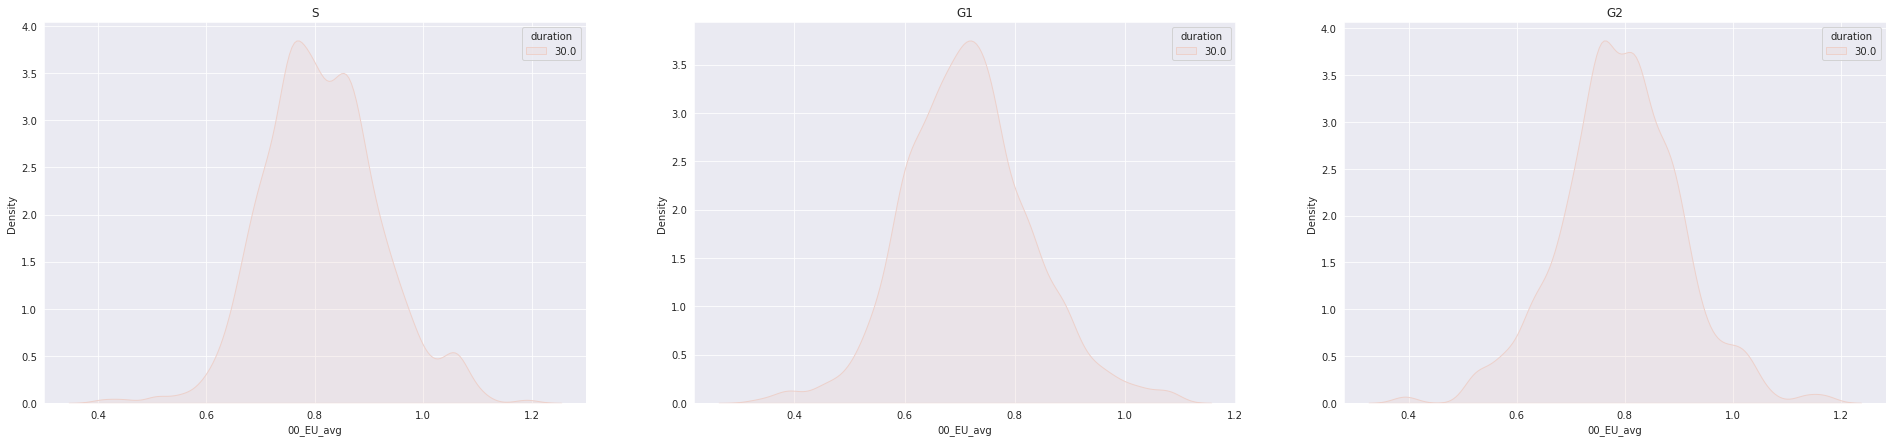

In [67]:
cell_cycles = meta_small.cell_cycle.unique()

plt.figure(figsize=(3*11,7))
for i, cc in enumerate(cell_cycles, 1):
    mask = meta_small.cell_cycle == cc
    mask &= (meta_small.perturbation == 'TSA')
    
    plt.subplot(1,3,i)
    sns.kdeplot(x='00_EU_avg', 
                hue='duration', 
                #hue_order=cell_cycle_order,
                data=meta_small[mask], 
                shade=True, 
                bw_method=0.2)
    plt.title(cc)

## No

Summary:
- Only "perturbation" and "cell_cylce" have influence over the TR distribution
- use only perturbations DMSO and normal

In [79]:
meta_small = metadata[['mapobject_id_cell', 'cell_cycle', 'perturbation', '00_EU_avg']].copy()
meta_small

,mapobject_id_cell,cell_cycle,perturbation,00_EU_avg
0,369487,S,CX5461,0.726790
1,369488,G1,CX5461,0.386809
2,369489,G1,CX5461,0.413402
3,369490,G1,CX5461,0.408767
4,369491,S,CX5461,0.571223
...,...,...,...,...
13095,266516,G2,normal,0.962255
13096,266518,G1,normal,1.142740
13097,266519,G2,normal,0.935372
13098,266520,G1,normal,0.821446


Since TR distribution depends on the cell cycle, then two test:
- Create a dataset only for G1 and another for S and G2
- Create only one dataset, but sample cells such that the dataset have same number of G1, S and G2 cells

In [89]:
mask = (meta_small.perturbation == 'DMSO') | (meta_small.perturbation == 'normal')
cell_cycles = meta_small.cell_cycle.unique()

for cc in cell_cycles:
    mask2 = mask & (meta_small.cell_cycle == cc)
    cc_count = meta_small[mask2].shape[0]
    print(cc, cc_count)

S 1070
G1 2070
G2 563


In [37]:
p = {}
p['seed'] = 123
p['train_frac'] = 0.8
p['val_frac'] = 0.1

perturbations = ['normal', 'DMSO']
cell_cycles = ['G1']

metadata = metadata.groupby(['mapobject_id_cell'], sort=False, as_index=False).first()
# filter acordinglly to the selected perturbations
filtered_metadata = metadata[metadata.perturbation.isin(perturbations) & metadata.cell_cycle.isin(cell_cycles)]

In [38]:
# create df containing the mapobject_id_cell and its set
set_df = pd.DataFrame(columns=['mapobject_id_cell', 'set'])

# create train, val and test partitions keeping the proportion of perturbation and cell_cycle
for per in perturbations:
    for cc in cell_cycles:
        # Create mask that contains the cells with the corresponding perturbation and cell_cycle
        mask = (filtered_metadata.perturbation == per) & (filtered_metadata.cell_cycle == cc)
        # get mapobject_id_cell and the size of the train, val and test partitions
        cell_ids = filtered_metadata[mask].mapobject_id_cell.values
        n_train = int(len(cell_ids) * p['train_frac'])
        n_val = int(len(cell_ids) * p['val_frac'])
        n_test = len(cell_ids) - n_train - n_val
        print('For partition (perturbation, cell_cycle)=({}, {}):'.format(per, cc))
        print('\tNumber of cells in train set: {}, val set: {}, test_set: {}\n\tTotal number of cells: {}\n'.format(n_train, n_val, n_test, n_train+n_val+n_test))

        # get the mapobject_id_cell belonging to the train, val and test partitions
        np.random.seed(p['seed'])
        np.random.shuffle(cell_ids)
        train_cell_ids = cell_ids[0:n_train]
        val_cell_ids = cell_ids[n_train:n_train+n_val]
        test_cell_ids = cell_ids[n_train+n_val:n_train+n_val+n_test]
        
        # Save cell id with its corresponding set
        temp_df = pd.DataFrame(train_cell_ids, columns=['mapobject_id_cell'])
        temp_df['set'] = 'train'
        set_df = pd.concat((set_df, temp_df), ignore_index=True)
        temp_df = pd.DataFrame(val_cell_ids, columns=['mapobject_id_cell'])
        temp_df['set'] = 'val'
        set_df = pd.concat((set_df, temp_df), ignore_index=True)
        temp_df = pd.DataFrame(test_cell_ids, columns=['mapobject_id_cell'])
        temp_df['set'] = 'test'
        set_df = pd.concat((set_df, temp_df), ignore_index=True)
# merge the filtered_metadata with the df containing the set
filtered_metadata = filtered_metadata.merge(set_df,
                        left_on='mapobject_id_cell',
                        right_on='mapobject_id_cell',
                        how='left')
        
n_train = np.sum(filtered_metadata.set == 'train')
n_val = np.sum(filtered_metadata.set == 'val')
n_test = np.sum(filtered_metadata.set == 'test')
print('Number of cells in train set: {}, val set: {}, test_set: {}\nTotal number of cells: {}\n'.format(n_train, n_val, n_test, n_train+n_val+n_test))

For partition (perturbation, cell_cycle)=(normal, G1):
	Number of cells in train set: 1140, val set: 142, test_set: 144
	Total number of cells: 1426

For partition (perturbation, cell_cycle)=(DMSO, G1):
	Number of cells in train set: 515, val set: 64, test_set: 65
	Total number of cells: 644

Number of cells in train set: 1655, val set: 206, test_set: 209
Total number of cells: 2070



In [43]:
subset = 'train'
mask = (filtered_metadata.set == subset)
filtered_cells = filtered_metadata.mapobject_id_cell[mask].values.astype(str)
filtered_cells

array(['263044', '263047', '364195', ..., '262738', '210124', '266512'],
      dtype='<U6')

In [43]:
target_perturbations = ['normal', 'DMSO']
target_cell_cycles = ['G1']

# Create mask that contains the target mapobject_id_cell acordinglly with the perturbation and cell_cycle criteria
mask = np.zeros(metadata.shape[0]).astype(np.bool)
for per in target_perturbations:
    mask |= metadata.perturbation == per
for cc in target_cell_cycles:
    mask &= metadata.cell_cycle == cc

metadata[mask]

,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,mapobject_id_cell,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
4367,263057,plate01,J16,0,0,0,0,6,0,263044,plate01,J16,0,0,0,0,6,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.559914,0.673521,0.367085,0.416994,0.645986,0.562562,0.459997,0.536572,0.133353,0.747884,0.092656,0.680816,0.416561,0.450028,0.597563,0.924112,0.989534,0.139680,0.387210,0.756921,0.290736,0.915663,0.535581,0.474428,0.482097,0.738551,0.392874,0.724019,0.614959,0.582054,0.706530,0.590277,0.675308,0.910371,0.964073,0.789988,0.571108,0.550479
4369,263060,plate01,J16,0,0,0,0,9,0,263047,plate01,J16,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.501752,0.544152,1.288875,1.577494,1.167879,1.208178,0.887331,1.574985,0.194347,0.647281,0.699402,0.854071,0.520319,1.073794,0.366597,1.098936,0.955131,1.623222,0.766097,0.825827,0.963407,1.126784,1.200570,1.321706,1.195229,0.813766,0.843695,1.097583,0.611882,1.071663,0.626599,0.408824,0.841230,0.998162,1.053085,1.172326,1.504990,1.011448
4372,364377,plate01,J16,0,1,0,0,16,0,364190,plate01,J16,0,1,0,0,16,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.602427,0.774355,0.466658,0.578625,0.717787,0.502849,0.525678,0.530381,0.215161,0.462980,0.601882,0.706457,0.384828,0.559197,0.689008,0.619311,0.519019,0.546790,0.635413,0.376641,0.587950,0.535495,0.602359,0.517679,0.430845,0.877169,0.406116,0.431656,0.756563,0.506149,0.713877,0.729979,0.623625,0.568352,0.885829,0.823889,0.601848,0.688373
4375,364381,plate01,J16,0,1,0,0,20,0,364194,plate01,J16,0,1,0,0,20,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.635524,0.813555,0.409325,0.591749,0.809583,0.300919,0.546370,0.759385,0.156538,0.446558,0.711936,0.717527,0.368288,0.653042,0.756524,0.581475,0.540922,0.558016,0.584978,0.320155,0.619451,0.500455,0.660010,0.628479,0.461650,0.785709,0.275579,0.455327,0.771088,0.539711,0.916688,0.842896,0.760016,0.575643,0.839296,0.673479,0.781761,0.775597
4376,364382,plate01,J16,0,1,0,0,21,0,364195,plate01,J16,0,1,0,0,21,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.436704,0.567245,0.284972,0.376710,0.571165,0.393772,0.358408,0.468708,0.123928,0.276254,0.339783,0.525064,0.304278,0.523438,0.516612,0.506276,0.407601,0.321772,0.459581,0.278899,0.308826,0.382522,0.492428,0.417493,0.297031,0.733094,0.258409,0.287238,0.616878,0.420122,0.630320,0.617078,0.516705,0.494917,0.824544,0.736374,0.620735,0.629935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11900,195398,plate01,J12,4,3,0,0,60,0,195267,plate01,J12,4,3,0,0,60,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,normal,NaN,0.771491,0.565092,0.636713,0.993336,0.812013,0.232635,0.825019,0.136992,0.364689,0.722921,0.751757,1.068456,0.290313,0.168081,0.544502,0.591773,0.626469,0.205762,0.792477,0.663925,0.760857,0.701123,0.629179,0.527530,0.681989,0.887573,0.550069,0.414785,0.838548,0.580189,0.951450,0.551912,0.860169,0.695133,0.878112,0.929830,0.130135,0.162422
11902,262807,plate01,J12,4,4,0,0,48,0,262738,plate01,J12,4,4,0,0,48,0,0.0,NaN,0.0,NaN,0.0,NaN,G1

In [44]:
# get mapobject_id_cell and the size of the train, val and test partitions
cell_ids = metadata[mask].mapobject_id_cell.values
n_train = int(len(cell_ids) * p['train_frac'])
n_val = int(len(cell_ids) * p['val_frac'])
n_test = len(cell_ids) - n_train - n_val
print('Number of cells in train set: {}, val set: {}, test_set: {}\nTotal number of cells: {}'.format(n_train, n_val, n_test, n_train+n_val+n_test))

# get the mapobject_id_cell belonging to the train, val and test partitions
np.random.seed(p['seed'])
np.random.shuffle(cell_ids)
train_cell_ids = cell_ids[0:n_train]
val_cell_ids = cell_ids[n_train:n_train+n_val]
test_cell_ids = cell_ids[n_train+n_val:n_train+n_val+n_test]

# create df containing the mapobject_id_cell and its set
set_df = pd.DataFrame(columns=['mapobject_id_cell', 'set'])
temp_df = pd.DataFrame(train_cell_ids, columns=['mapobject_id_cell'])
temp_df['set'] = 'train'
set_df = pd.concat((set_df, temp_df), ignore_index=True)
temp_df = pd.DataFrame(val_cell_ids, columns=['mapobject_id_cell'])
temp_df['set'] = 'val'
set_df = pd.concat((set_df, temp_df), ignore_index=True)
temp_df = pd.DataFrame(test_cell_ids, columns=['mapobject_id_cell'])
temp_df['set'] = 'test'
set_df = pd.concat((set_df, temp_df), ignore_index=True)

# merge the filtered_metadata with the df containing the set
filtered_metadata = metadata[mask].merge(set_df,
                        left_on='mapobject_id_cell',
                        right_on='mapobject_id_cell',
                        how='left')

Number of cells in train set: 1656, val set: 207, test_set: 207
Total number of cells: 2070


In [45]:
print(len(filtered_metadata.mapobject_id_cell.unique()))
print((filtered_metadata.set == 'train').sum())
print((filtered_metadata.set == 'val').sum())
print((filtered_metadata.set == 'test').sum())

2070
1656
207
207


In [46]:
# take a look into the train, val, and test distribution

<AxesSubplot:xlabel='10_POL2RA_pS2_avg', ylabel='00_EU_avg'>

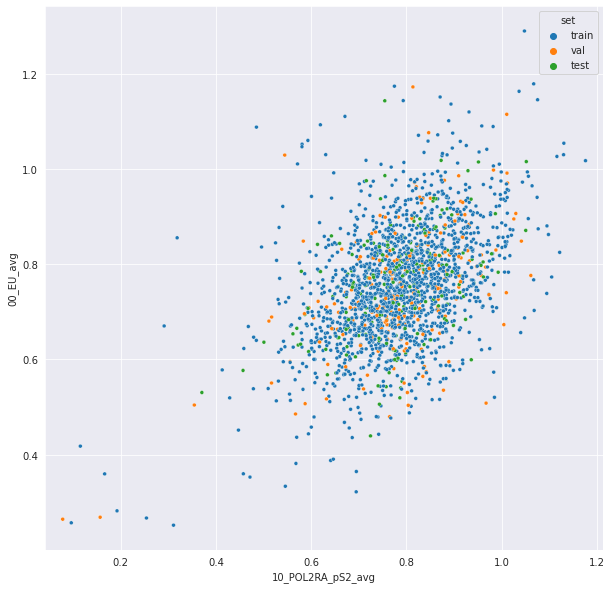

In [47]:
plt.figure(figsize=(10,10))
plt.axis('equal')
sns.scatterplot(data=filtered_metadata,
                x='10_POL2RA_pS2_avg',
                y='00_EU_avg',
                hue='set',
                hue_order=['train', 'val', 'test'],
                #alpha=0.5,
                s=15
               )

<AxesSubplot:xlabel='set', ylabel='00_EU_avg'>

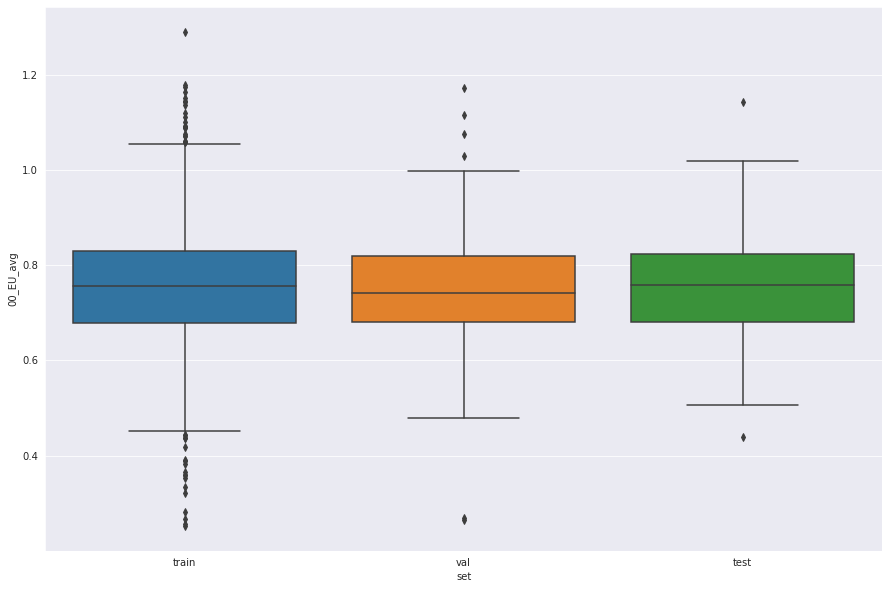

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(data=filtered_metadata,
            x='set',
            y='00_EU_avg'
           )

In [56]:
perturbations = ['normal', 'DMSO']
cell_cycles = ['G1']
metadata[metadata.perturbation.isin(perturbations) & metadata.cell_cycle.isin(cell_cycles)]

,mapobject_id_cell,mapobject_id,plate_name,well_name,well_pos_y,well_pos_x,tpoint,zplane,label,is_border,plate_name_cell,well_name_cell,well_pos_y_cell,well_pos_x_cell,tpoint_cell,zplane_cell,label_cell,is_border_cell,is_mitotic,is_mitotic_labels,is_polynuclei_HeLa,is_polynuclei_HeLa_labels,is_polynuclei_184A1,is_polynuclei_184A1_labels,cell_cycle,cell_type,perturbation,duration,00_DAPI_avg,07_H2B_avg,01_CDK9_pT186_avg,03_CDK9_avg,05_GTF2B_avg,07_SETD1A_avg,08_H3K4me3_avg,09_SRRM2_avg,10_H3K27ac_avg,11_KPNA2_MAX_avg,12_RB1_pS807_S811_avg,13_PABPN1_avg,14_PCNA_avg,15_SON_avg,16_H3_avg,17_HDAC3_avg,19_KPNA1_MAX_avg,20_SP100_avg,21_NCL_avg,01_PABPC1_avg,02_CDK7_avg,03_RPS6_avg,05_Sm_avg,07_POLR2A_avg,09_CCNT1_avg,10_POL2RA_pS2_avg,11_PML_avg,12_YAP1_avg,13_POL2RA_pS5_avg,15_U2SNRNPB_avg,18_NONO_avg,20_ALYREF_avg,21_COIL_avg,00_BG488_avg,00_BG568_avg,00_EU_avg,09_SRRM2_ILASTIK_avg,15_SON_ILASTIK_avg
4367,263044,263057,plate01,J16,0,0,0,0,6,0,plate01,J16,0,0,0,0,6,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.559914,0.673521,0.367085,0.416994,0.645986,0.562562,0.459997,0.536572,0.133353,0.747884,0.092656,0.680816,0.416561,0.450028,0.597563,0.924112,0.989534,0.139680,0.387210,0.756921,0.290736,0.915663,0.535581,0.474428,0.482097,0.738551,0.392874,0.724019,0.614959,0.582054,0.706530,0.590277,0.675308,0.910371,0.964073,0.789988,0.571108,0.550479
4369,263047,263060,plate01,J16,0,0,0,0,9,0,plate01,J16,0,0,0,0,9,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.501752,0.544152,1.288875,1.577494,1.167879,1.208178,0.887331,1.574985,0.194347,0.647281,0.699402,0.854071,0.520319,1.073794,0.366597,1.098936,0.955131,1.623222,0.766097,0.825827,0.963407,1.126784,1.200570,1.321706,1.195229,0.813766,0.843695,1.097583,0.611882,1.071663,0.626599,0.408824,0.841230,0.998162,1.053085,1.172326,1.504990,1.011448
4372,364190,364377,plate01,J16,0,1,0,0,16,0,plate01,J16,0,1,0,0,16,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.602427,0.774355,0.466658,0.578625,0.717787,0.502849,0.525678,0.530381,0.215161,0.462980,0.601882,0.706457,0.384828,0.559197,0.689008,0.619311,0.519019,0.546790,0.635413,0.376641,0.587950,0.535495,0.602359,0.517679,0.430845,0.877169,0.406116,0.431656,0.756563,0.506149,0.713877,0.729979,0.623625,0.568352,0.885829,0.823889,0.601848,0.688373
4375,364194,364381,plate01,J16,0,1,0,0,20,0,plate01,J16,0,1,0,0,20,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.635524,0.813555,0.409325,0.591749,0.809583,0.300919,0.546370,0.759385,0.156538,0.446558,0.711936,0.717527,0.368288,0.653042,0.756524,0.581475,0.540922,0.558016,0.584978,0.320155,0.619451,0.500455,0.660010,0.628479,0.461650,0.785709,0.275579,0.455327,0.771088,0.539711,0.916688,0.842896,0.760016,0.575643,0.839296,0.673479,0.781761,0.775597
4376,364195,364382,plate01,J16,0,1,0,0,21,0,plate01,J16,0,1,0,0,21,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,DMSO,720.0,0.436704,0.567245,0.284972,0.376710,0.571165,0.393772,0.358408,0.468708,0.123928,0.276254,0.339783,0.525064,0.304278,0.523438,0.516612,0.506276,0.407601,0.321772,0.459581,0.278899,0.308826,0.382522,0.492428,0.417493,0.297031,0.733094,0.258409,0.287238,0.616878,0.420122,0.630320,0.617078,0.516705,0.494917,0.824544,0.736374,0.620735,0.629935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11900,195267,195398,plate01,J12,4,3,0,0,60,0,plate01,J12,4,3,0,0,60,0,0.0,NaN,0.0,NaN,0.0,NaN,G1,184A1,normal,NaN,0.771491,0.565092,0.636713,0.993336,0.812013,0.232635,0.825019,0.136992,0.364689,0.722921,0.751757,1.068456,0.290313,0.168081,0.544502,0.591773,0.626469,0.205762,0.792477,0.663925,0.760857,0.701123,0.629179,0.527530,0.681989,0.887573,0.550069,0.414785,0.838548,0.580189,0.951450,0.551912,0.860169,0.695133,0.878112,0.929830,0.130135,0.162422
11902,262738,262807,plate01,J12,4,4,0,0,48,0,plate01,J12,4,4,0,0,48,0,0.0,NaN,0.0,NaN,0.0,NaN,G1

In [59]:
val_cell_ids.astype(str)

array(['248024', '210640', '291580', '242705', '321028', '330829',
       '330831', '256507', '337289', '279406', '260098', '337290',
       '259724', '383851', '375028', '345255', '249371', '323168',
       '226848', '235724', '323145', '385342', '345875', '195218',
       '194802', '257474', '351947', '196939', '248046', '225917',
       '351192', '351031', '203461', '378146', '295686', '337004',
       '340174', '195480', '375064', '304708', '193527', '209824',
       '226873', '258546', '213582', '332255', '330830', '375063',
       '263047', '210642', '384887', '383822', '268549', '205755',
       '194805', '383853', '258530', '213604', '271494', '205737',
       '256513', '221658', '243861', '352352', '385321', '361802',
       '324769', '359152', '195487', '221646', '277038', '262715',
       '380624', '261401', '306901', '351946', '203470', '279415',
       '239157', '321007', '233596', '279384', '205751', '339588',
       '363225', '375586', '347693', '221656', '249370', '2861